In [2]:
import numpy as np
import nibabel as nib
from pathlib import Path
import matplotlib.pyplot as plt

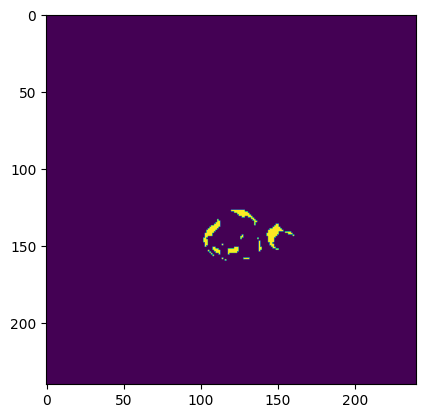

image	 torch.Size([4, 240, 240]) torch.Size([4, 240, 240]) torch.float32
mask	 torch.Size([240, 240]) torch.Size([240, 240]) torch.int64


In [3]:
from lazy_dataset import BraTSDataset
# DATA_DIR = '../../data-1/BraTS2021/BraTS2021_Training_Data'
DATA_DIR = './datasets/BraTS2021_Training_Data'
dataset = BraTSDataset(DATA_DIR, list(range(50, 70)))
item = dataset.__getitem__(2010)
image = item["image"]
mask = item["mask"]
plt.imshow(mask)
plt.show()

print("image\t", image.shape, image.size(), image.dtype)
print("mask\t", mask.shape, mask.size(), mask.dtype)

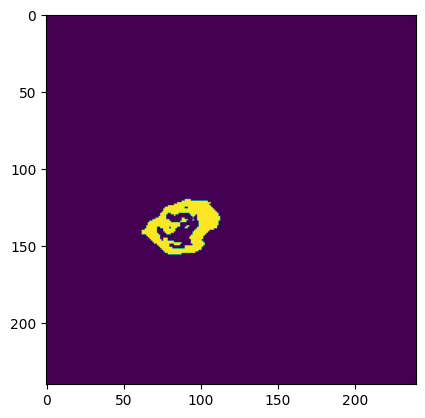

In [4]:
from data_preV2 import load_data, get_data_path
paths = get_data_path(Path(DATA_DIR))
mask = load_data(paths[0], "mask", 80)

plt.imshow(mask)
plt.show()

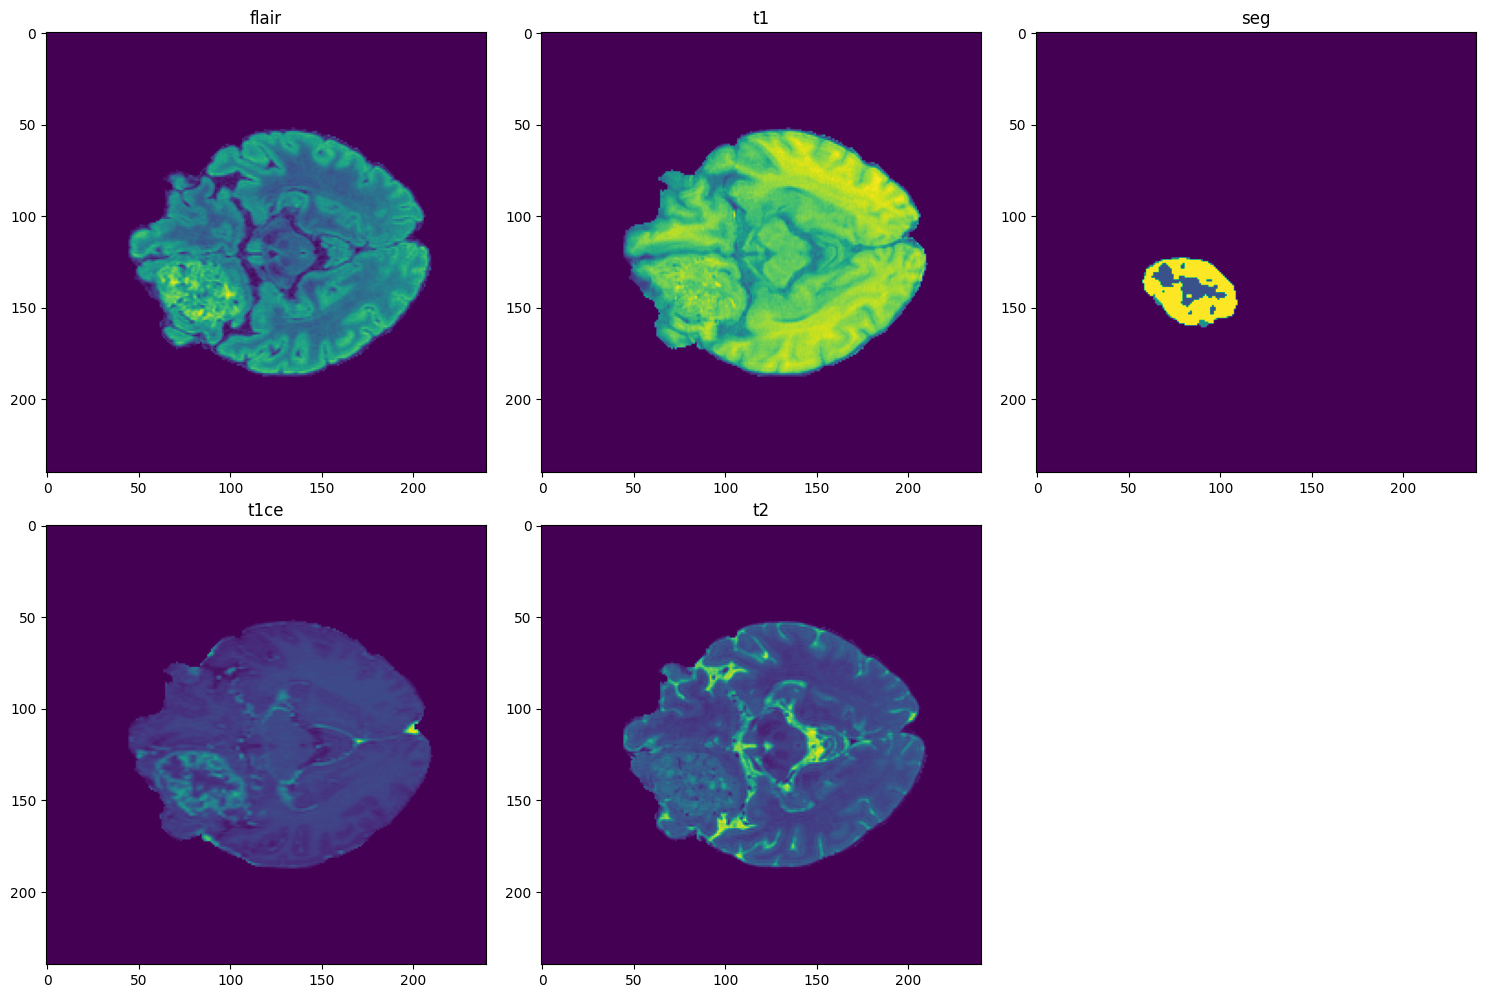

In [8]:
DATA_TYPE = ("flair", "t1", "seg", "t1ce", "t2")

def get_data(data_id, data_type, frame: int):
    data_path = f"./BraTS2021_Training_Data/BraTS2021_{data_id}/BraTS2021_{data_id}_{data_type}.nii.gz"
    return nib.load(data_path).get_fdata()[:,:,frame]

def glance_data(data_id: str, frame: int = 0):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i, data_type in enumerate(DATA_TYPE):
        row = i // 3
        col = i % 3
        d = get_data(data_id, data_type, frame)

        axs[row, col].imshow(d)
        axs[row, col].set_title(data_type)

    fig.delaxes(axs[1, 2])

    plt.tight_layout()
    plt.show()

glance_data("00000", 60)